In [93]:
import numpy as np
from ase.build import bulk
from ase.visualize import view
from ase.calculators.emt import EMT
from ase import Atoms

# 1. DEFORMING LATTICE WITH MATRIX
element = "Pd"
Cu = bulk(element, cubic=True) #Creating a cubic Copper structure, if cubic was not on it would only show one atom of copper at the [0 0 0] position
#super_Cu = bulk("O", cubic=True).repeat((2,2,2)) #similar to the simple cubic but more atoms involved (not currently being used)


origin = Cu.get_scaled_positions()
orig_cell = Cu.get_cell() 

deformation = [(np.eye(3)*((1+x)**(1.0/3.0))) for x in np.linspace(-0.1, 0.1, 20)] #Getting 7 deformations ±10%


deformed_matrices = [] #Empty matrix to store the deformed cell structures
energies = [] #Empty matrix to store energies
volumes = [] #Empty matrix to store volumes

for defo in deformation:
    new_cell = np.dot(orig_cell, defo) #Getting the scaled matrix 
    new_pos_matrix = np.dot(origin, new_cell) #Changing the scaled matrix back to cartesian coordinates

    # 2. CREATING THE NEW STRUCTURE WITH THE DEFORMED LATTICE
    #Saving the deformed matrices back into the atom to be called later
    new_atoms = Atoms(
        symbols = Cu.get_chemical_symbols(),
        positions = new_pos_matrix,
        cell = new_cell,
        pbc = True
    )

    # 3. USE THE SAME CALCULATOR (LIKE EMT) TO GET THE NEW POTENTIAL ENERGY
    new_atoms.calc = EMT() #ASSIGN CALCULATOR

    energies.append(new_atoms.get_potential_energy())
    deformed_matrices.append(new_atoms)
    volumes.append(new_atoms.get_volume())
    

#print(energies)
#print(deformed_matrices[0].get_positions())
#print(volumes)

best_volume = volumes[np.argmin(energies)]
best_a = best_volume ** 1/3
print(f"Best volume is: {best_volume:.2f}")
print(f"Best edge length (a): {best_a:.2f}")



Best volume is: 58.55
Best edge length (a): 19.52


Text(0.5, 1.0, 'Pd Plot')

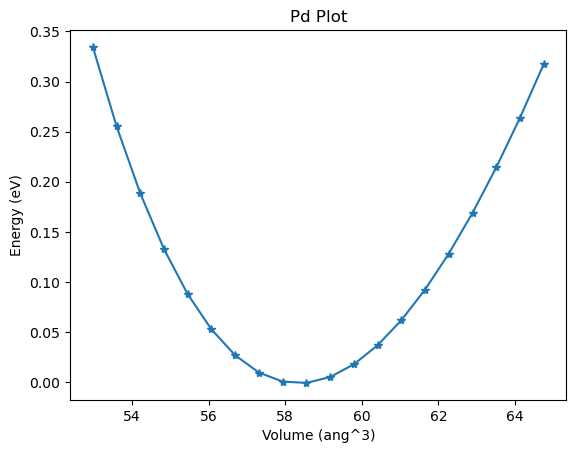

In [95]:
import matplotlib.pyplot as plt

plt.plot(volumes, energies, "*-")
plt.xlabel("Volume (ang^3)")
plt.ylabel("Energy (eV)")
plt.title(f"{element} Plot")